<font color='green' size='6'>Italy </font>
<font color ='red' size='6'>Menu</font>
<br>

## Research Question
#### Generating meal compositions with AI

**Name:** Andrea <br>
**Name:** Emilio <br>
**Name:** Mayya Lihovodov <br>

**Name:** Igal Khalfin <br>
**Name:** Dima Vornov  <br>
**Name:** Adi Zamir    <br>
**Name:** Adir Nisim   <br>
**Name:** Nir Levy    <br>

Starting Date: 24/11/2022


<font color='green' size='5'>
Import Modules (Packages) </font>
<br>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import inf
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


<h1><ins>Data Handling Section </ins></h1>
<br>
* read CSV file <br>
* removing rows where quantity < 0 <br>
 * Adding Columns: <br>
<font color='darkgreen'>
    Price_Before_Discount(full price), <br>
    Earnings (Paid price - cost), <br>
    Margin (Earnings / paid price as precentage % view), <br>
    Unit_Price, <br>
    Sale_Month (for EDA and future purpess), <br>
    Menu Category, mapping category by specifay item name (food/soft drink/alcohol).
</font>

In [16]:
df = pd.read_csv('Query_Sicilia_2021.csv', index_col=0)  

In [17]:
df[df.QUANTITY < 0]

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE
2079,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-1,-1.0,0.0,-0.13,NaN
2080,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,MELANZANE AL POMODORO (C),FOOD,RICETTE FOOD,CONTORNO,-1,-3.9,0.0,-0.31,NaN
2081,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,COCA COLA 33CL TIN,BEVERAGE,ACQUA E SOFT DRINKS,SOFT DRINKS,-1,-3.0,0.0,-0.40,NaN
2082,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,-1,-3.1,0.0,-0.25,NaN
2083,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,GNOCCHI ALLA BOLOGNESE,FOOD,RICETTE FOOD,PRIMO,-1,-4.9,0.0,-0.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335501,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,HAMBURGER ALLA GRIGLIA (C),FOOD,RICETTE FOOD,SECONDO,-1,-8.0,0.0,-0.65,NaN
2335502,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-3,-3.0,0.0,-0.40,NaN
2335859,TENACIA,NAP-TRI,RI,599532021-10-09,20211009,20211009,BAR,TENACIA BAR,71,205011,20.0,VECCHIA ROMAGNA E.N. CL 4,BEVERAGE,RICETTE ALCOLICHE,SUPERALCOLICI LISCI,-1,-4.0,0.0,-0.68,NaN
2336556,TENACIA,NAP-TRI,IR,633972021-10-30,20211030,20211030,SELF,TENACIA Front Desk,16,133936,13.0,BIRRA BECK S 33CL BT,BEVERAGE,BIRRE,BIRRA PAX,-1,-4.5,0.0,-0.65,NaN


In [18]:
positive_quantity_df = df[df['QUANTITY'] > 0].copy()

positive_quantity_df['PRICE_BEFORE_DISCOUNT'] = positive_quantity_df['PRICE_PAID'] + positive_quantity_df['DISCOUNT']
positive_quantity_df['EARNINGS'] = positive_quantity_df['PRICE_PAID'] - positive_quantity_df['COST_OF_SALE']
positive_quantity_df["SALE_MONTH"] = pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).month
positive_quantity_df['MARGIN'] = positive_quantity_df['EARNINGS'] / positive_quantity_df['PRICE_PAID']
positive_quantity_df.loc[positive_quantity_df['MARGIN'] < 0, 'MARGIN'] = 0
positive_quantity_df['MARGIN_RAW'] = positive_quantity_df['MARGIN']
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'] * 100
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'].round(2).astype(str) + '%'
positive_quantity_df['UNIT_PRICE'] = positive_quantity_df['PRICE_PAID'] / positive_quantity_df['QUANTITY']
positive_quantity_df = positive_quantity_df[positive_quantity_df.MARGIN != inf]

In [19]:
menu_category = {
    'FOOD':[ 'CROISSANTS E BREAKFAST', 'SNACK', 'PIZZA', 'SALSE MONOPORZIONE', 'SECONDO', 'PRIMO', 'CONTORNO', 'PANE E COPERTO PASTI', 'ANTIPASTO', 
       'DOLCE', 'FRUTTA', 'PANINI', 'CARAMELLE', 'ALTRO', 'GELATI CONFEZIONATI', 'PANE E COPERTO BREAKFAST', 'CONFETTURE', 'CELIACI',
       'PIATTO UNICO', 'MERENDINE', 'PANE E SIMILI', 'CEREALI', 'FORMAGGI', 'BIBITE SCIROPPATE', 'YOGHURT', 'RICORRENZE E DECORAZIONI' ],
    'SOFT DRINK': [ 
        "CAFFE'", 'ACQUA', 'CAPPUCCINO', 'THE E INFUSI', 'SUCCHI', 'SOFT DRINKS', 'GRANITA', 'CIOCCOLATA', ],
    'ALCOHOL': [
        'VINI ITALIANI', 'SUPERALCOLICI LISCI', 'LATTE MACCHIATO', 'APERITIVO', 'BIRRA PAX', 'COCKTAILS', 'SPUMANTE', 'CHAMPAGNE', 'VINO BIANCO', ],
    'CORRECTION': ['CORREZIONE']
}
mapping = {}
for key in menu_category:
    for value in menu_category[key]:
        mapping[value] = key


positive_quantity_df['MENU_CATEGORY'] = positive_quantity_df['ITEM_CATEGORY'].map(mapping)

 <h1><ins>Data EDA-Visualization </ins></h1>
 <br>
 we want to get point of view from margin and earning

In [20]:
margin_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['MARGIN_RAW'], aggfunc=np.average)
margin_by_location

,MARGIN_RAW
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,0.794625
ANTARES BAR 2,0.852819
ANTARES RISTORANTE,0.868285
ARIES BAR 1,0.795602
ARIES BAR 2,0.834957
...,...
SPL GELATERIA,0.854253
SPM BAR Centrale,0.727487
SPM BAR Piscina,0.732457


In [21]:
earnings_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_location

,EARNINGS
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,215352.15
ANTARES BAR 2,61800.84
ANTARES Front Desk,3738.77
ANTARES RISTORANTE,123926.97
ANTARES Self Pax,187983.09
...,...
SPM RISTORANTE,16414.05
SPM SELF Passeggeri,95559.30
TENACIA BAR,161258.96


<AxesSubplot: xlabel='SHIP'>

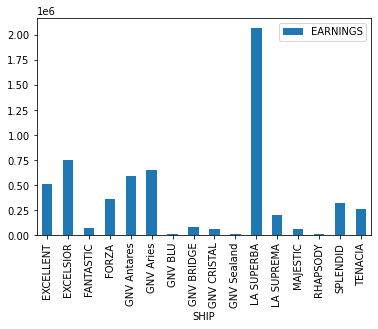

In [22]:
earnings_by_ship = pd.pivot_table(positive_quantity_df, index=['SHIP'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_ship.plot.bar()

<h2>Earnings By Month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

<AxesSubplot: xlabel='SALE_MONTH'>

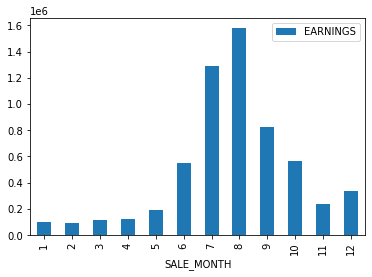

In [23]:
earnings_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_month.plot.bar()

<h2>Top sellers of each month</h2>
<h4>As we can see, <strong>Summer</strong> season is the stongest season of them all when it comes to earnings</h4>

In [24]:
#groupby_quantity = positive_quantity_df.groupby(['SALE_MONTH','ITEM_CATEGORY']).agg({'QUANTITY':sum})
#groupby_month = 
#_quantity['QUANTITY'].groupby('SALE_MONTH', group_keys=False)
#groupby_month.nlargest(3)


In [25]:
seasonal_df = positive_quantity_df.copy()
mapping = {}
for i in range(1,12):
    if(i<3):
        mapping[i]='Winter'
    elif(i>=3 and i<6):
        mapping[i]='Spring'
    elif(i>=6 and i <9):
        mapping[i]='Summer'
    else:
        mapping[i]='Autumn'
mapping[12]='Winter'
seasonal_df['Seasons']= seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum})

QUANTITY
Seasons MENU_CATEGORY          
Autumn  ALCOHOL           67651
        CORRECTION         1193
        FOOD             554480
        SOFT DRINK       359204
Spring  ALCOHOL           31752
        CORRECTION          980
        FOOD             299546
        SOFT DRINK       176328
Summer  ALCOHOL          110035
        CORRECTION         1579
        FOOD             864819
        SOFT DRINK       635686
Winter  ALCOHOL           27913
        CORRECTION          776
        FOOD             296348
        SOFT DRINK       174703

<AxesSubplot: ylabel='Seasons'>

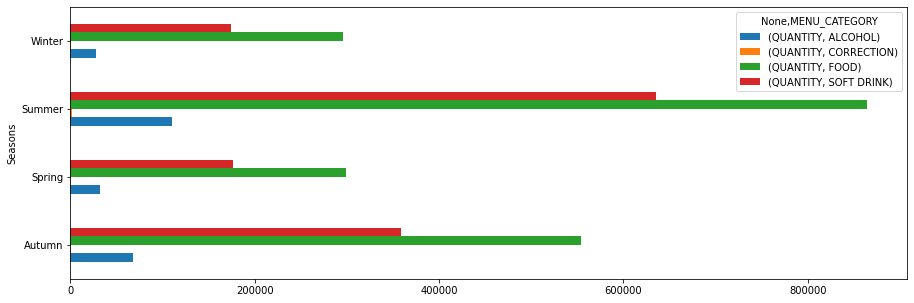

In [26]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum}).unstack(1).plot.barh(figsize=(15,5))

<AxesSubplot: ylabel='Seasons'>

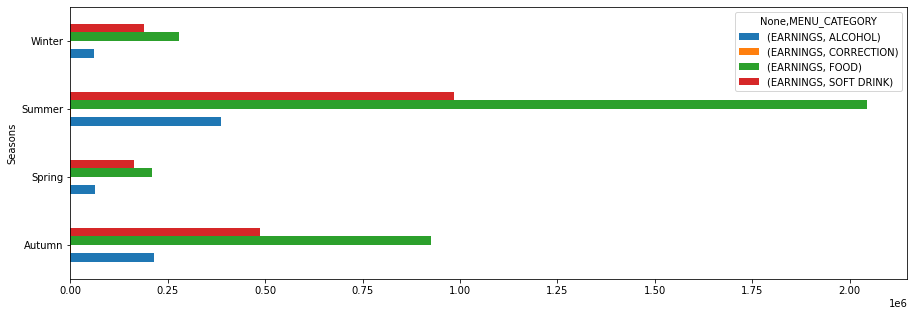

In [27]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))

<AxesSubplot: ylabel='SALE_DAY'>

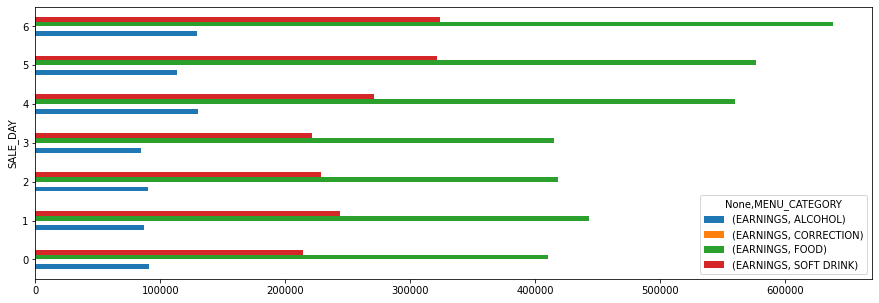

In [28]:

seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))


<AxesSubplot: ylabel='SALE_DAY'>

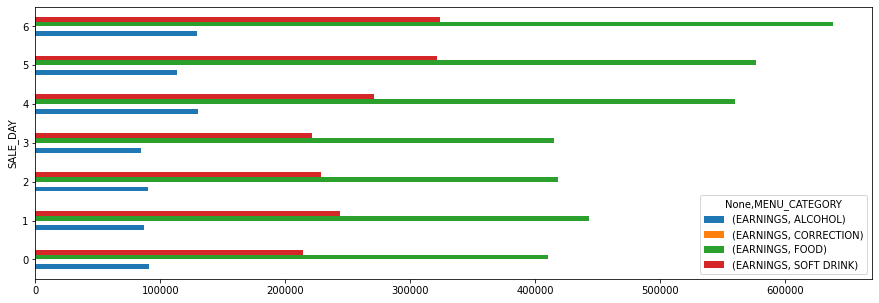

In [29]:
seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':'sum'},{'EARNINGS':'mean'}).unstack(1).plot.barh(figsize=(15,5))

## Sales season classification
### We will be classifing all the sales periods to season tiers of sales volumes: High, Mid, Low

In [30]:
mapping = {}
for i in range(1, 13):
    if(i in { 7, 8 }):
        mapping[i] = 'High'
    elif(i in { 6, 9, 10 }):
        mapping[i] = 'Mid'
    else:
        mapping[i] = 'Low'

seasonal_df['SALES_TIER_SEASON'] = seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low


## Sales Days Classification
### We will be classifing all the sales periods to days tiers of sales volumes: Low (Sunday - Wedensday), High(Thursday - Saturday) 

In [31]:
mapping = {}
for i in range(0, 7):
    if i in range(0,4):
        mapping[i] = 'Low'
    else:
        mapping[i] = 'High'

seasonal_df['SALES_TIER_DAYS'] = seasonal_df['SALE_DAY'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON,SALES_TIER_DAYS
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low,High
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low,High
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low,High
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low,High
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low,High
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High


## Meal Name Correlation By Bill

In [32]:
group_headers = ['SHIP', 'LINE', 'ROUTE', 'VOYAGE_ID_VOYAGE_DATE', 'VOYAGE_DATE', 'SALE_DATE',
                 'POINT_OF_SALE', 'POINT_OF_SALE_LOCATION', 'BILL_NUMBER', 'BILL_TIME', 'BILL_HOUR', 'Seasons',	'SALES_TIER_SEASON']

seasonal_df['JOINED_ITEM'] = seasonal_df['ITEM'].str.replace('  ', '_').str.replace(' ', '_')

seasonal_df['JOINED_ITEM']

0                             CAFFE_ESPRESSO
1                             CAFFE_ESPRESSO
2                         ACQUA_NAT_50CL_PET
3              CROISSANT_CREMA_NOCC._85G_FRZ
4                                 CAPPUCCINO
                         ...                
2338035                   ACQUA_NAT_50CL_PET
2338036                 PANE_E_SERVIZIO_SELF
2338037                    VERDURA_AL_VAPORE
2338038    ANELLETTI_AL_FORNO_ALLA_SICILIANA
2338039              COCA_COLA_ZERO_33CL_TIN
Name: JOINED_ITEM, Length: 2333815, dtype: object

### List of joined items by bill

In [33]:
joined_bill_df = seasonal_df.groupby(group_headers)['JOINED_ITEM'].transform(lambda x: ' '.join(x))

joined_bill_df = pd.DataFrame(joined_bill_df)
joined_bill_df

,JOINED_ITEM
0,CAFFE_ESPRESSO
1,CAFFE_ESPRESSO
2,ACQUA_NAT_50CL_PET
3,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
4,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
...,...
2338035,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338036,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338037,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338038,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...


In [34]:
customStopwords=list(STOPWORDS) + ['CAFFE', 'nat', 'gas', 'al', 'pet', 'cl', 'g', 'self', 'fz', 'servizio'] + [f'{x}cl' for x in range(0,200)] + [f'{x}g' for x in range(0,200)]

c_vec = CountVectorizer(stop_words=customStopwords, ngram_range=(2,3))
ngrams = c_vec.fit_transform(joined_bill_df.head(100000)['JOINED_ITEM'])
count_values = ngrams.toarray().sum(axis=0)
count_values
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'FREQUENCY', 1:'BIGRAM_TRIGRAM'})


c:\Users\Igal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'caffe', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [35]:
df_ngram

,FREQUENCY,BIGRAM_TRIGRAM
0,6857,cornetto_marmell _lievitato_fz
1,5934,croissant_crema_nocc _85g_frz
2,2343,pane_e_servizio_self patatine_fritte
3,2239,muffin_doppio_cioccol _90g_frz
4,2143,birra_peroni_n azzurro_33cl_bt
...,...,...
37974,2,30 croissant_crema_nocc
37975,2,30 cookies_cioko_latte_50g
37976,2,30 caffe_americano
37977,2,30 birra_peroni_n azzurro_33cl_bt


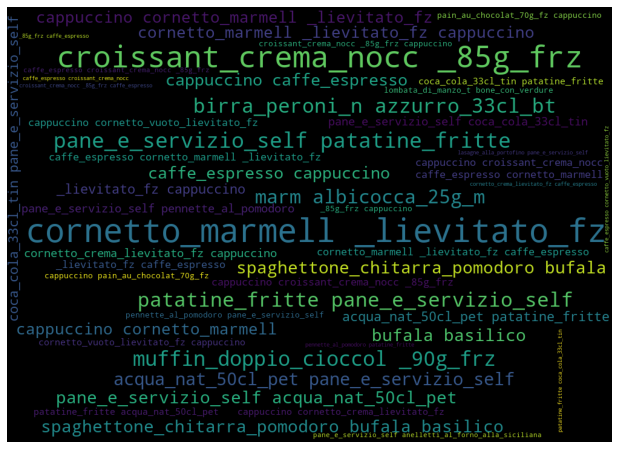

In [36]:
d = {}
for a, x in df_ngram.values:
    d[x] = a

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720,
                            collocations=False
                          ).generate_from_frequencies(d)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Margin-Volume matrix


<AxesSubplot: >

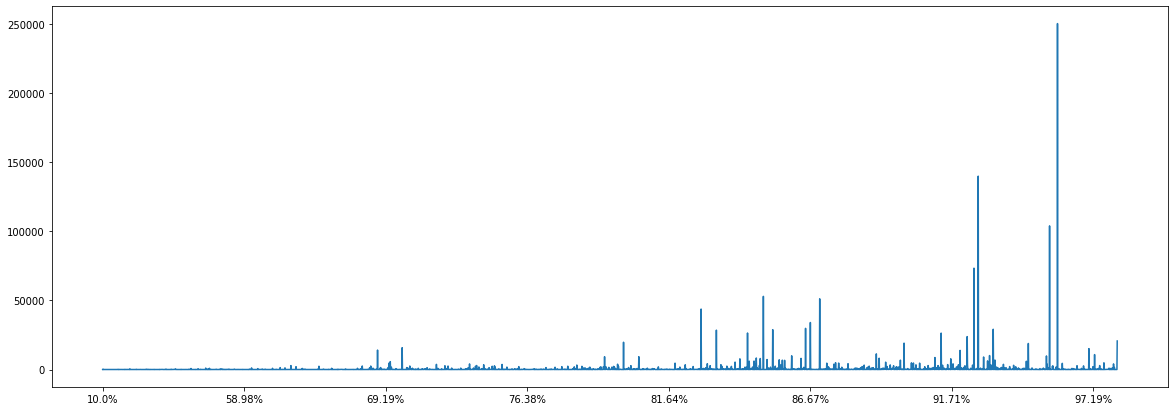

In [37]:
margins=seasonal_df['MARGIN'].value_counts()
margins=margins.drop(labels=['0.0%'])
margins.sort_index(inplace=True)
margins.plot(figsize=(20, 7))


<h2> Total earnings by weekend</h2>
<h4>Separate the data between weekend days and not.</h4>
<h4>Sunday - Wednesday  - Not weekend</h4>
<h4>Thursday - Saturday - Weekend.</h4>
<h4>Display the earning between them</h4>

<AxesSubplot: ylabel='None,WEEKEND_SALE'>

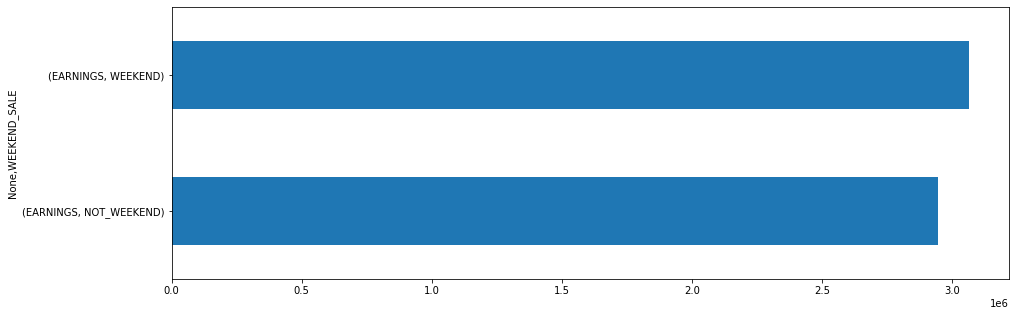

In [38]:
week_end_choice=['WEEKEND','NOT_WEEKEND']
weekend_mapping={}
for i in range(0,7):
    if(i in{4,6,5}):
        weekend_mapping[i]='WEEKEND'
    else:
        weekend_mapping[i]='NOT_WEEKEND'


seasonal_df['WEEKEND_SALE']=seasonal_df['SALE_DAY'].map(weekend_mapping)


seasonal_df.groupby(['WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Revenue per month</h1>

<AxesSubplot: ylabel='None,SALE_MONTH'>

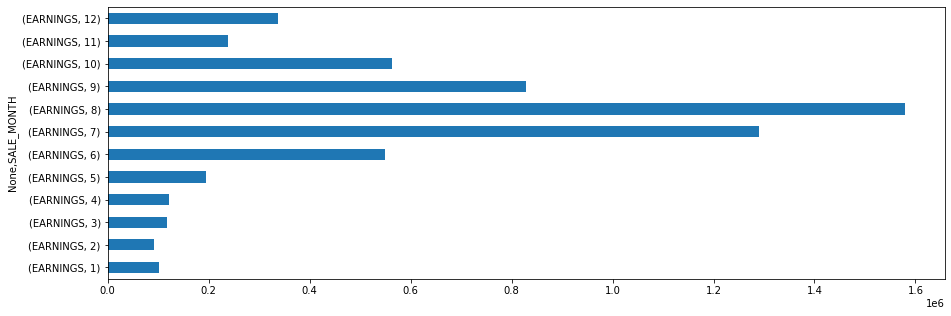

In [39]:
seasonal_df.groupby(['SALE_MONTH']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Products Popularity</h1>
<h4>Display the quantity of products between seasons </h4>

<AxesSubplot: ylabel='ITEM_CATEGORY'>

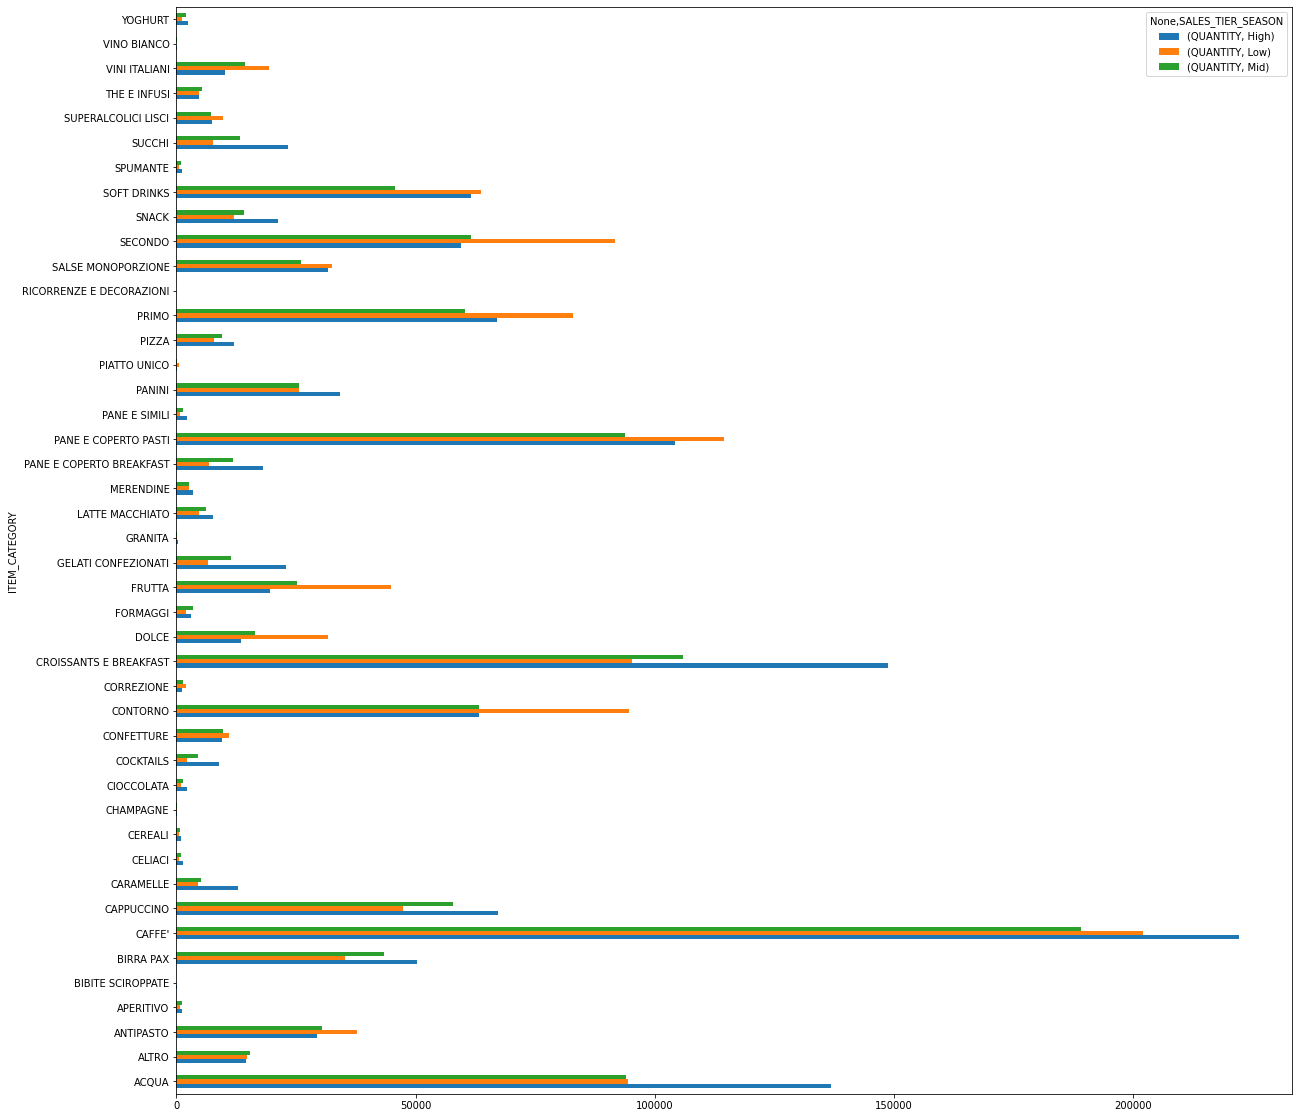

In [40]:
seasonal_df.groupby(['ITEM_CATEGORY','SALES_TIER_SEASON']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h4>Display the quantity of products weekend and not weekend </h4>

<AxesSubplot: ylabel='ITEM_CATEGORY'>

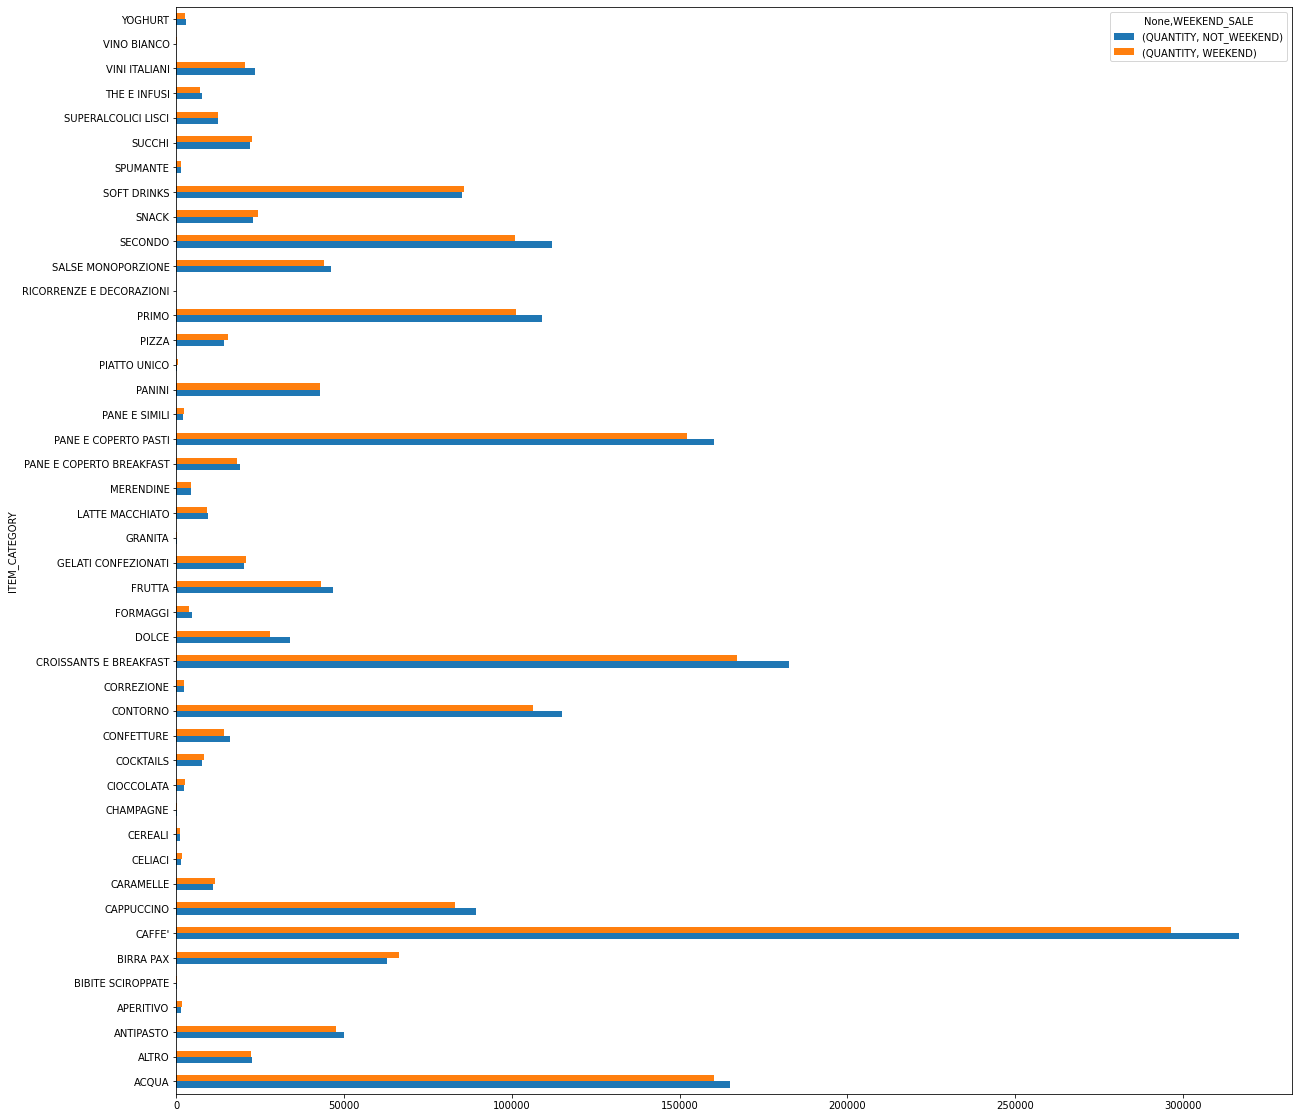

In [41]:
seasonal_df.groupby(['ITEM_CATEGORY','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h1>Separate the data to six groups according to seasons and weekends</h1>
<h4>Display the quantity </h4>

<AxesSubplot: ylabel='SALES_TIER_SEASON'>

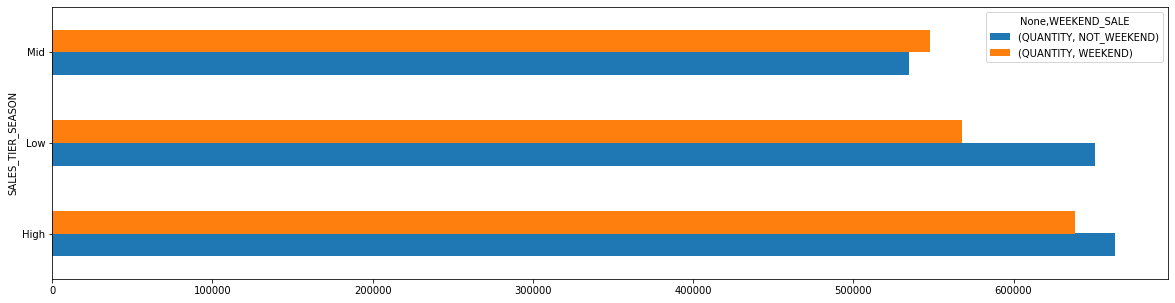

In [42]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,5))

<h4>Display the earnings </h4>

<AxesSubplot: ylabel='SALES_TIER_SEASON'>

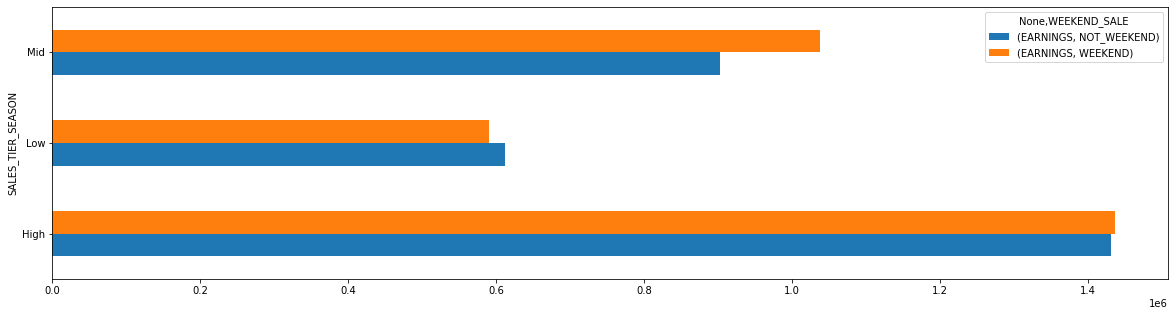

In [43]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(20,5))

# BCG Categorization 

In [44]:
food_df = seasonal_df[(seasonal_df['MENU_CATEGORY'] == 'FOOD')] # & (seasonal_df['DISCOUNT'] == 0) & (seasonal_df['PRICE_PAID'] != 0)]
food_df
#TODO: Devide the quantity for each item in every season by the total quantity sold in all seasons.

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON,SALES_TIER_DAYS,JOINED_ITEM,WEEKEND_SALE
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.0,1.8,0.36,SA1,1.8,-0.36,1,0.0%,0.00,0.0,FOOD,Winter,4,Low,High,CROISSANT_CREMA_NOCC._85G_FRZ,WEEKEND
6,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,6,80706,8.0,CORNETTO MARMELL. LIEVITATO FZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.0,1.8,0.31,SA1,1.8,-0.31,1,0.0%,0.00,0.0,FOOD,Winter,4,Low,High,CORNETTO_MARMELL._LIEVITATO_FZ,WEEKEND
7,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,7,81330,8.0,PAIN AU CHOCOLAT 70G FZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,1.8,0.0,0.27,NaN,1.8,1.53,1,85.0%,0.85,1.8,FOOD,Winter,4,Low,High,PAIN_AU_CHOCOLAT_70G_FZ,WEEKEND
10,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,8,81645,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.0,1.8,0.36,SA1,1.8,-0.36,1,0.0%,0.00,0.0,FOOD,Winter,4,Low,High,CROISSANT_CREMA_NOCC._85G_FRZ,WEEKEND
11,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,9,83037,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,1.8,0.0,0.36,NaN,1.8,1.44,1,80.0%,0.80,1.8,FOOD,Winter,4,Low,High,CROISSANT_CREMA_NOCC._85G_FRZ,WEEKEND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338033,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,POLPETTE IN UMIDO (C),FOOD,RICETTE FOOD,SECONDO,6,0.0,48.0,3.51,SA1,48.0,-3.51,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,POLPETTE_IN_UMIDO_(C),WEEKEND
2338034,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,6,0.0,18.6,1.57,SA1,18.6,-1.57,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,FRUTTA_FRESCA,WEEKEND
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.0,6.0,0.81,SA1,6.0,-0.81,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,PANE_E_SERVIZIO_SELF,WEEKEND
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.0,23.4,0.98,SA1,23.4,-0.98,12,0.0%,0.00,0.0,FOOD,Winter,5,Low,High,VERDURA_AL_VAPORE,WEEKEND


### General Margin Processing

Saving a state of the processed data while filtered by food category.

In [45]:
food_df.to_csv('processed_data_food_category.csv')


Reloading the data with it's current state.

In [46]:
food_df = pd.read_csv('processed_data_food_category.csv')

#### Getting an average of earnings and quantity for the current food items sold

Therefore we should get the general earnings and quantity sums amoung every season for the average item:

In [47]:
def categorize(row, avg_quantity, avg_earnings):
    if row['QUANTITY'] >= avg_quantity and row['EARNINGS'] >= avg_earnings:
        return 'Star'
    elif row['QUANTITY'] <= avg_quantity and row['EARNINGS'] >= avg_earnings:
        return 'Puzzle'
    elif row['QUANTITY'] >= avg_quantity and row['EARNINGS'] <= avg_earnings:
        return 'WorkHorse'
    elif row['QUANTITY'] <= avg_quantity and row['EARNINGS'] <= avg_earnings:
        return 'Dog'

In [70]:
def get_bcg_categories_by_season(season: str):
    item_avg_prices = food_df.groupby(['ITEM']).agg({'QUANTITY':'sum', 'EARNINGS':'sum'})
    item_avg_prices_for_season = food_df[food_df['SALES_TIER_SEASON'] == season].groupby(['ITEM']).agg({'QUANTITY':'sum', 'EARNINGS':'sum'})
    item_avg_prices['AVG_EARNINGS_FOR_SINGLE_ITEM'] = item_avg_prices['EARNINGS'] / item_avg_prices['QUANTITY']
    item_avg_prices

    avg_earnings_for_sold_item = item_avg_prices['AVG_EARNINGS_FOR_SINGLE_ITEM'].mean()
    avg_earnings_for_sold_item

    avg_quantity_for_sold_item = item_avg_prices_for_season['QUANTITY'].mean()
    avg_quantity_for_sold_item

    print(f'Average quantity for an item type sold: {avg_quantity_for_sold_item}')
    print(f'Average earnings for an item sold: {avg_earnings_for_sold_item}')

    item_avg_prices_for_season['BCG_CATEGORY'] = item_avg_prices_for_season.apply(lambda x : categorize(x, avg_earnings_for_sold_item, avg_quantity_for_sold_item), axis=1)
    return item_avg_prices_for_season

### Peak Season

In [80]:
get_bcg_categories_by_season('High')

Average quantity for an item type sold: 1065.9907975460123
Average earnings for an item sold: 2.4863652643026004


,QUANTITY,EARNINGS,BCG_CATEGORY
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,296,329.41,WorkHorse
ACCIUGHE PANATE FRITTE,20,-46.92,WorkHorse
AGNELLO AL FORNO CON PATATE E CARCIOFI,136,107.67,WorkHorse
ALI DI POLLO SALE E PEPE (C),68,444.60,WorkHorse
ALPENLIEBE S.Z.ORIGINAL ASTUC.,232,303.61,WorkHorse
...,...,...,...
VERDURE GRIGLIATE E MARINATE,940,1322.25,Star
VITELLO CON VERDURE (C),16,29.66,WorkHorse
YOGURT IND. ALLA FRUTTA,1641,1676.41,Star


### Mid Season

In [75]:
get_bcg_categories_by_season('Mid')

Average quantity for an item type sold: 825.9045643153527
Average earnings for an item sold: 2.4863652643026004


,QUANTITY,EARNINGS,BCG_CATEGORY
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,360,90.87,WorkHorse
ACCIUGHE AL VERDE (C),17,-25.57,WorkHorse
AGNELLO AL FORNO CON PATATE E CARCIOFI,182,-157.14,WorkHorse
AGRUMI SI SICILIA MONOPORZIONE,1,4.20,Dog
ALI DI POLLO SALE E PEPE (C),553,2547.07,Star
...,...,...,...
VITELLO CON VERDURE (C),254,594.36,WorkHorse
YOGURT IND. ALLA FRUTTA,1277,866.13,Star
YOGURT IND. NATURALE,665,532.91,WorkHorse


### Low Season

In [76]:
get_bcg_categories_by_season('Low')

Average quantity for an item type sold: 833.9538638985006
Average earnings for an item sold: 2.4863652643026004


,QUANTITY,EARNINGS,BCG_CATEGORY
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,471,-63.25,WorkHorse
ACCIUGHE AL VERDE (C),67,-60.77,WorkHorse
ACCIUGHE PANATE FRITTE,26,-44.05,WorkHorse
AGNELLO AL FORNO CON PATATE E CARCIOFI,114,112.54,WorkHorse
ALI DI POLLO SALE E PEPE (C),392,255.06,WorkHorse
...,...,...,...
ZUPPA BORSCH,1,4.97,Dog
ZUPPA DI FAGIOLI (C),50,37.05,WorkHorse
ZUPPA DI LEGUMI (C),25,0.21,WorkHorse


In [83]:
bcg_df = food_df[['ITEM']].drop_duplicates()
bcg_df['HIGH_SEASON'] = bcg_df['ITEM'].map(get_bcg_categories_by_season('High')['BCG_CATEGORY'])
bcg_df['MID_SEASON'] = bcg_df['ITEM'].map(get_bcg_categories_by_season('Mid')['BCG_CATEGORY'])
bcg_df['LOW_SEASON'] = bcg_df['ITEM'].map(get_bcg_categories_by_season('Low')['BCG_CATEGORY'])
bcg_df


Average quantity for an item type sold: 1065.9907975460123
Average earnings for an item sold: 2.4863652643026004
Average quantity for an item type sold: 825.9045643153527
Average earnings for an item sold: 2.4863652643026004
Average quantity for an item type sold: 833.9538638985006
Average earnings for an item sold: 2.4863652643026004


,ITEM,HIGH_SEASON,MID_SEASON,LOW_SEASON
0,CROISSANT CREMA NOCC. 85G FRZ,Star,Star,Star
1,CORNETTO MARMELL. LIEVITATO FZ,Star,Star,Star
2,PAIN AU CHOCOLAT 70G FZ,Star,Star,Star
5,KRAPFEN ALLA CREMA FZ,Star,Star,Star
7,CORNETTO CREMA LIEVITATO FZ,Star,Star,Star
...,...,...,...,...
1151224,ZUPPA BORSCH,NaN,NaN,Dog
1153039,LINGUINE ALLE VONGOLE,NaN,NaN,WorkHorse
1153165,ARROSTO DI TACCHINO AL BRANDY,NaN,NaN,WorkHorse
1157757,PASSATO DI PISELLI (C),NaN,NaN,Dog
